In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def cartesian_product(*choices : np.array) -> pd.DataFrame:
    num_axis = len(choices)
    return pd.DataFrame(np.copy(np.vstack(np.vstack(np.meshgrid(*choices))).reshape(num_axis, -1).T))


In [31]:
def _cartesian_results(attribute: int, discipline: int, num_dice: int = 2, applicable_focus: bool = False) -> pd.DataFrame:
    d20 = np.arange(1, 21)
    dc = attribute + discipline
    cartesian_df = cartesian_product(*[d20] * num_dice)
    results_df = pd.DataFrame()
    results_df["base_successes"] = (cartesian_df <= dc).sum(axis="columns")
    results_df["critical_successes"] = (cartesian_df == 1).sum(axis="columns")
    results_df["focus_successes"] = (cartesian_df <= discipline ).sum(axis="columns")
    if applicable_focus:
        results_df["successes"] = results_df.loc[:, ["base_successes", "focus_successes"]].sum(axis="columns")
    else:
        results_df["successes"] = results_df.loc[:, ["base_successes", "critical_successes"]].sum(axis="columns")
    return results_df
    

In [32]:
def _create_probability_table(enumerated_results: pd.DataFrame) -> pd.DataFrame:
    prob_table_s = enumerated_results["successes"].value_counts(normalize=True, sort=False).sort_index(ascending=False).rename("exact")
    cum_prob_s = prob_table_s.cumsum().rename("cumulative")
    tab_df = pd.concat([prob_table_s, cum_prob_s], axis=1)
    return tab_df

In [33]:
def roll_prob_table(attribute: int, discipline: int, num_dice: int = 2, applicable_focus: bool = False) -> pd.DataFrame:
    cr_df = _cartesian_results(attribute=attribute, discipline=discipline, num_dice=num_dice, applicable_focus=applicable_focus)
    p_table = _create_probability_table(cr_df)
    return p_table

In [34]:
roll_5_7_2_F = roll_prob_table(5, 7, num_dice=2, applicable_focus=False)
display(roll_5_7_2_F)
roll_5_7_2_T = roll_prob_table(5, 7, num_dice=2, applicable_focus=True)
display(roll_5_7_2_T)
display(roll_prob_table(5, 7, 5, False))



,exact,cumulative
4,0.0025,0.0025
3,0.0550,0.0575
2,0.3425,0.4000
1,0.4400,0.8400
0,0.1600,1.0000


,exact,cumulative
4,0.1225,0.1225
3,0.1750,0.2975
2,0.3425,0.6400
1,0.2000,0.8400
0,0.1600,1.0000


,exact,cumulative
10,3.125000e-07,3.125000e-07
9,1.718750e-05,1.750000e-05
8,3.906250e-04,4.081250e-04
7,4.709375e-03,5.117500e-03
6,3.215156e-02,3.726906e-02
5,1.234784e-01,1.607475e-01
4,2.572125e-01,4.179600e-01
3,3.014000e-01,7.193600e-01
2,2.000000e-01,9.193600e-01
1,7.040000e-02,9.897600e-01


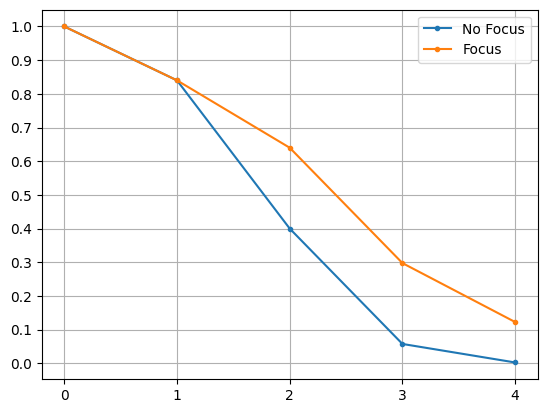

In [35]:
fig, ax = plt.subplots(1,1)
ax.plot(roll_5_7_2_F["cumulative"], marker=".", label="No Focus", )
ax.plot(roll_5_7_2_T["cumulative"], marker=".", label="Focus",)
ax.set_xticks(roll_5_7_2_F.index)
ax.set_yticks(np.linspace(0, 1, 11))
ax.legend()
ax .grid(True)
plt.show()